In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
import astropy.units as u
from astropy.wcs import WCS
from astropy import wcs
from astropy.table import Table
from hsc_utils import map_utils as mu
import cerrado
import pymaster as nmt

In [36]:
zs = ['z1','z2','z3','z4','singlez']
theta_smooth = [1,2,3,5,10, 15]  #arcmin 

nbins = 20 #number of bins to compute peaks, mfs, pdf and minima
l0_bins = np.linspace(2,2900,20)# bins to compute the power spectrum- Going up to 1900 to avoid spurious signal at higher ells
binner = nmt.NmtBinFlat(l0_bins[:-1], l0_bins[1:]) #Namaster power spectrum binner 
# The effective sampling rate for these bandpowers can be obtained calling:
ells_uncoupled = binner.get_effective_ells()


# Look some maps:

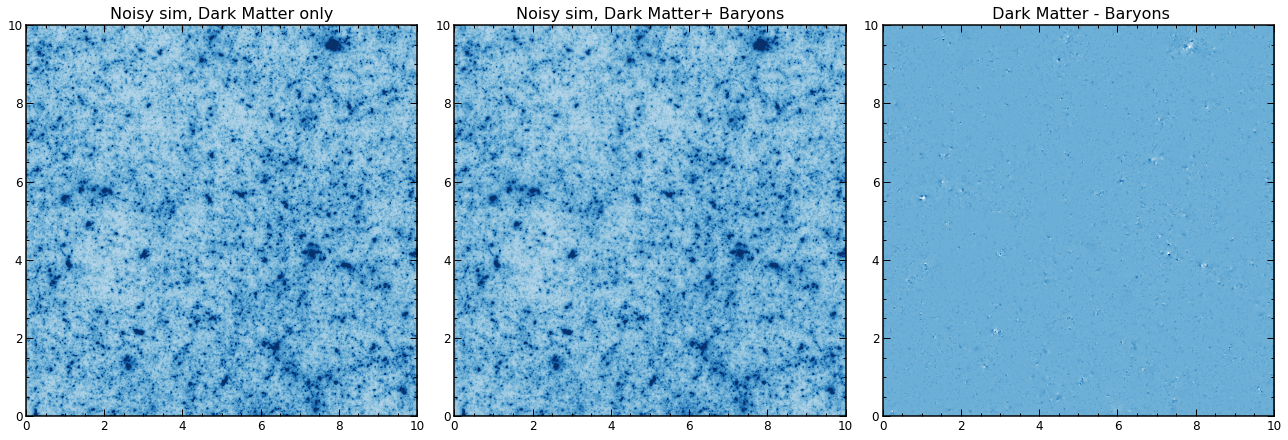

In [3]:
kappa_dark_singlez = np.load('/home/gabriela/Documents/Pesquisa/kappa_TNG_HSC/kappaTNG-Dark_HSCzs/singlez/kappa10.npy')
kappa_hydro_singlez = np.load('/home/gabriela/Documents/Pesquisa/kappa_TNG_HSC/kappaTNG-Hydro_HSCzs/singlez/kappa10.npy')

istds_noisy_d = kappa_dark_singlez.std() 
# istds_noisy_h = kappa_dark_singlez.std() 

 
#### plot the noise maps
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,18))
istd= istds_noisy_d 
ax1.imshow(kappa_dark_singlez, vmin=-3*istd, vmax=3*istd, origin='lower', extent=[0,10,0,10], cmap="Blues")
ax1.set_title('Noisy sim, Dark Matter only')

# istd= istds_noisy_h
ax2.imshow(kappa_hydro_singlez, vmin=-3*istd, vmax=3*istd, origin='lower', extent=[0,10,0,10], cmap="Blues")
ax2.set_title('Noisy sim, Dark Matter+ Baryons')

ax3.imshow(kappa_dark_singlez-kappa_hydro_singlez, vmin=-3*istd, vmax=3*istd, origin='lower', extent=[0,10,0,10], cmap="Blues")
ax3.set_title(' Dark Matter - Baryons')
plt.tight_layout()

plt.savefig('/home/gabriela/Documents/Pesquisa/kappaTNG2HSC/figures/comparison_realization_10.png', bbox_inches='tight')


# Check statistics:


0.4271788288583805
(6, 19, 19)


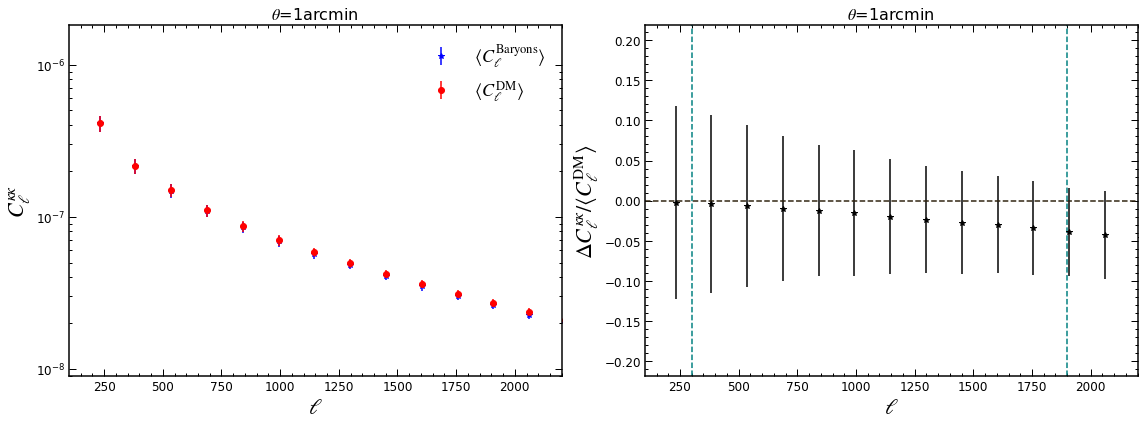

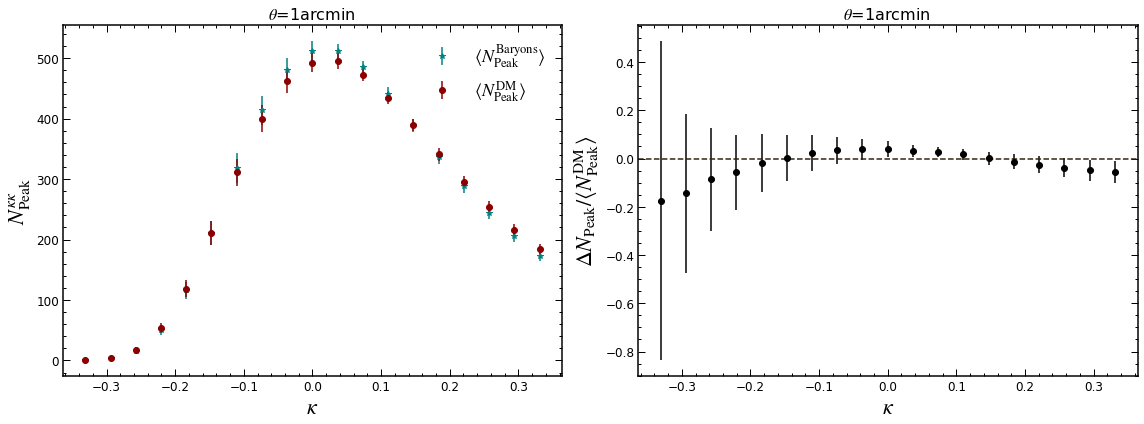

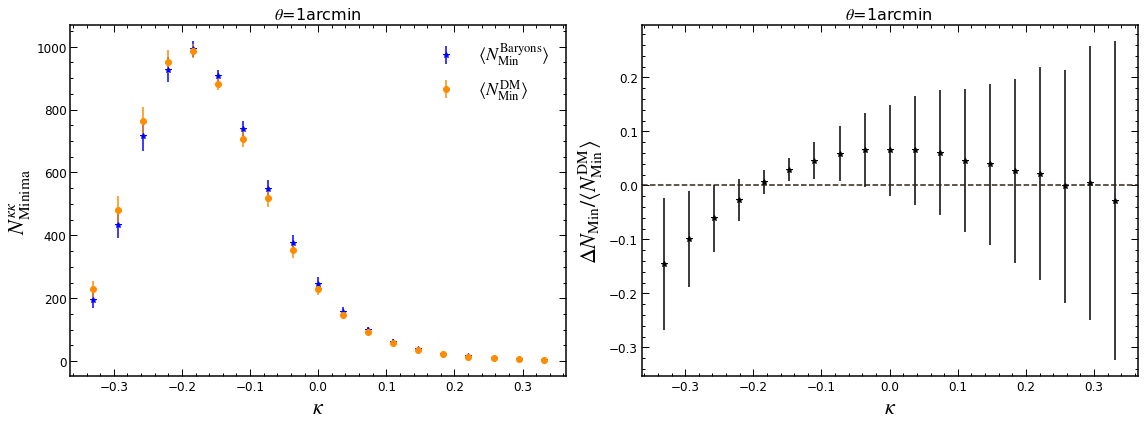

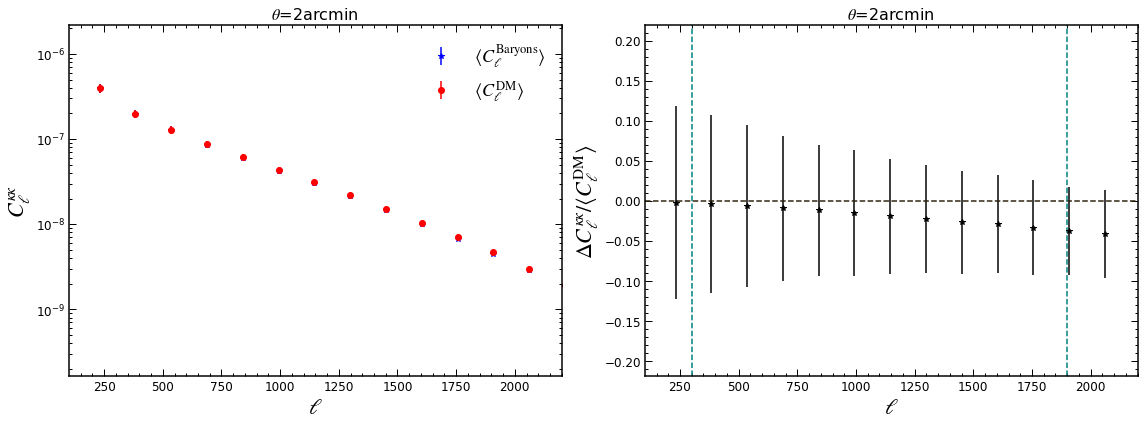

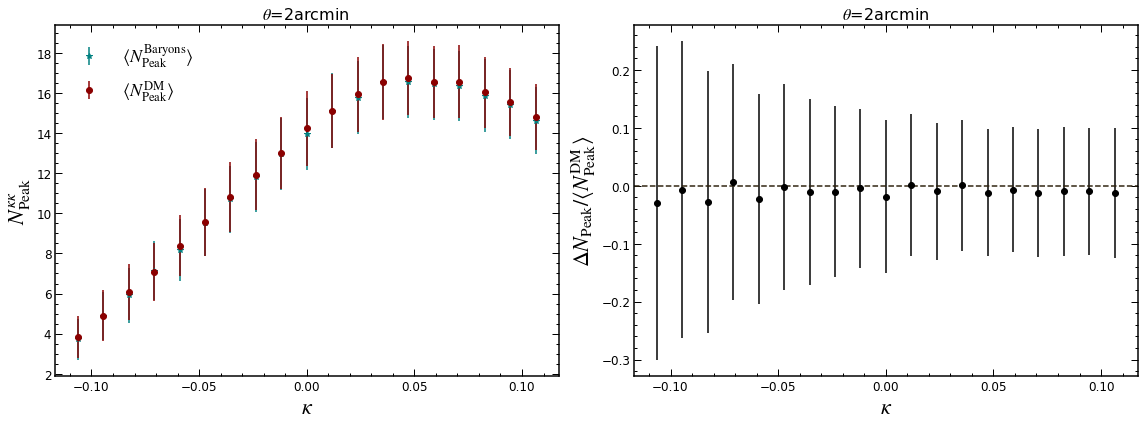

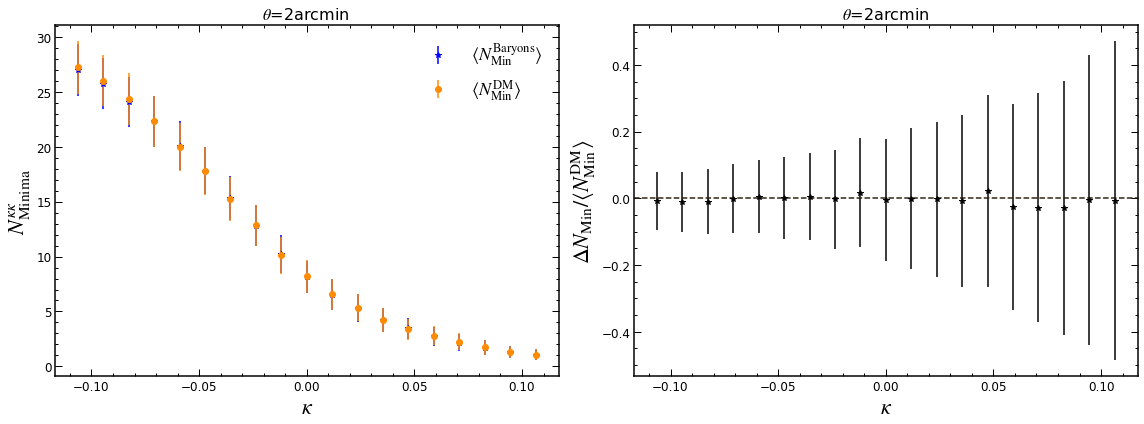

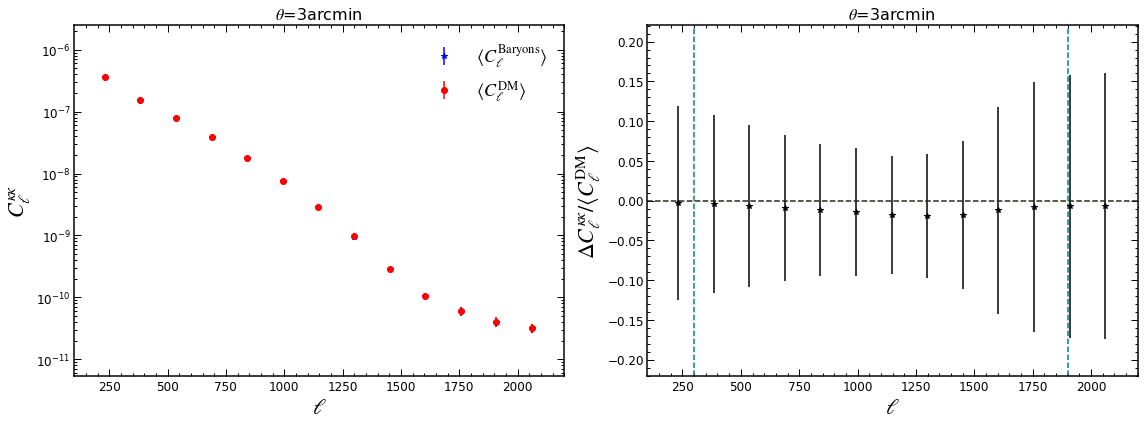

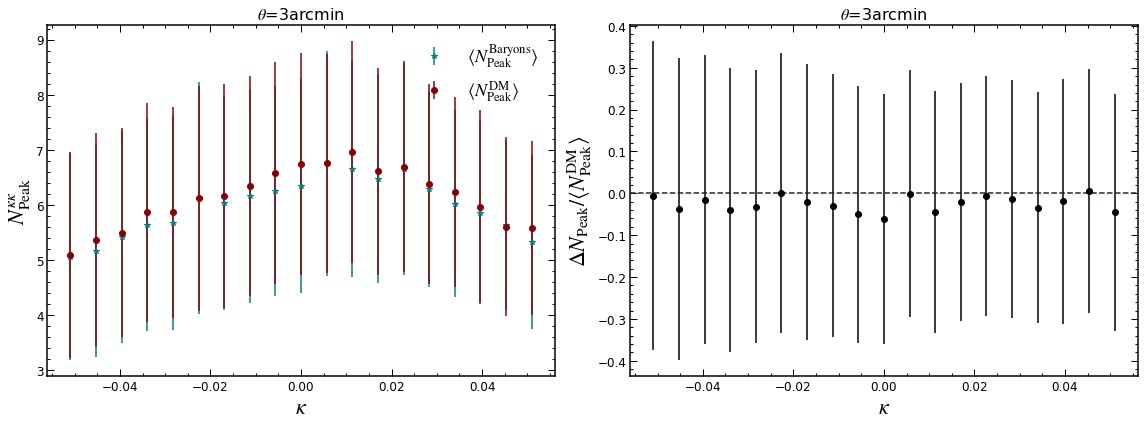

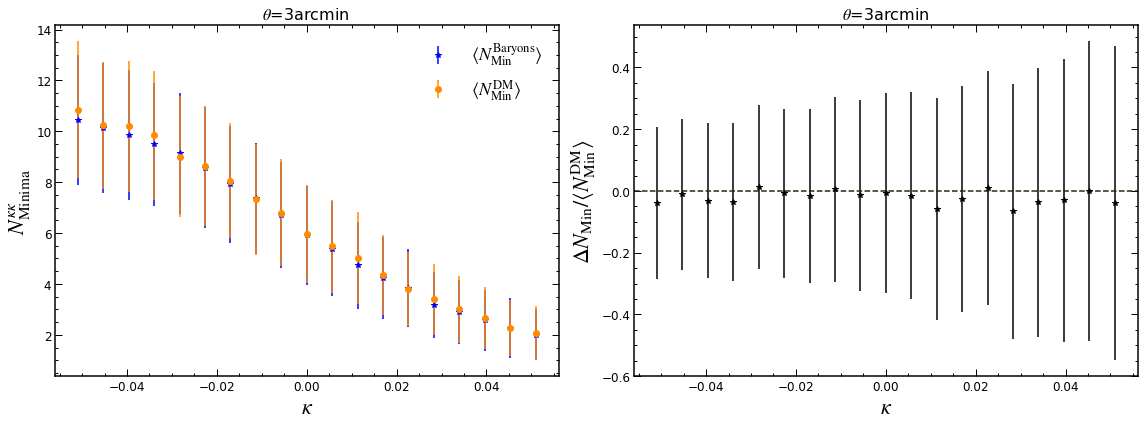

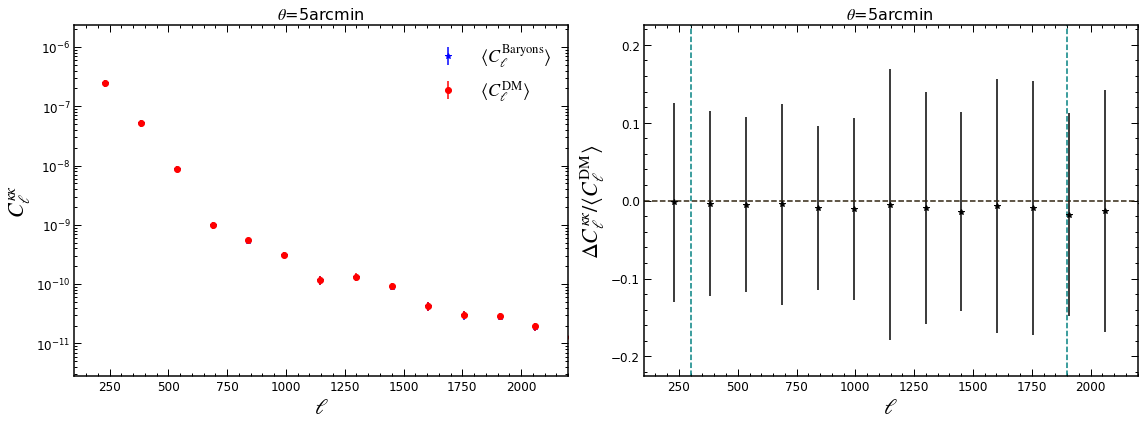

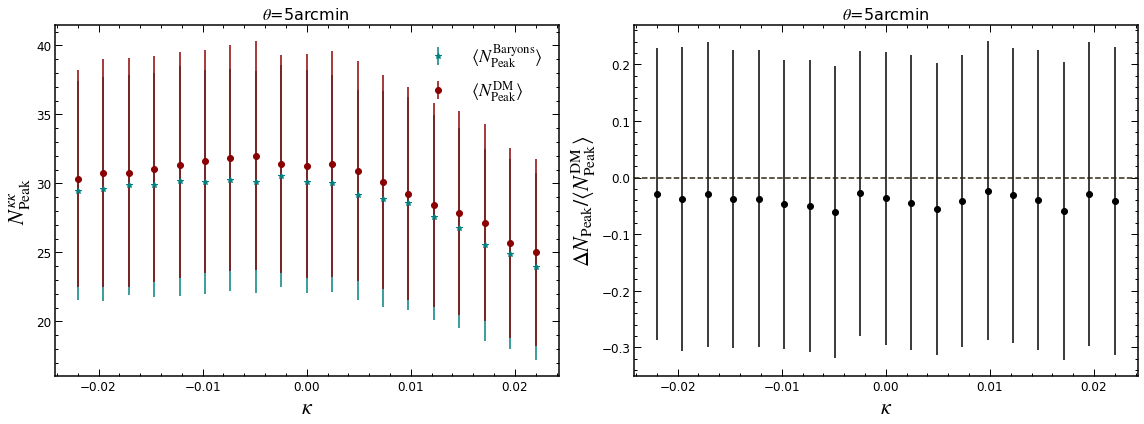

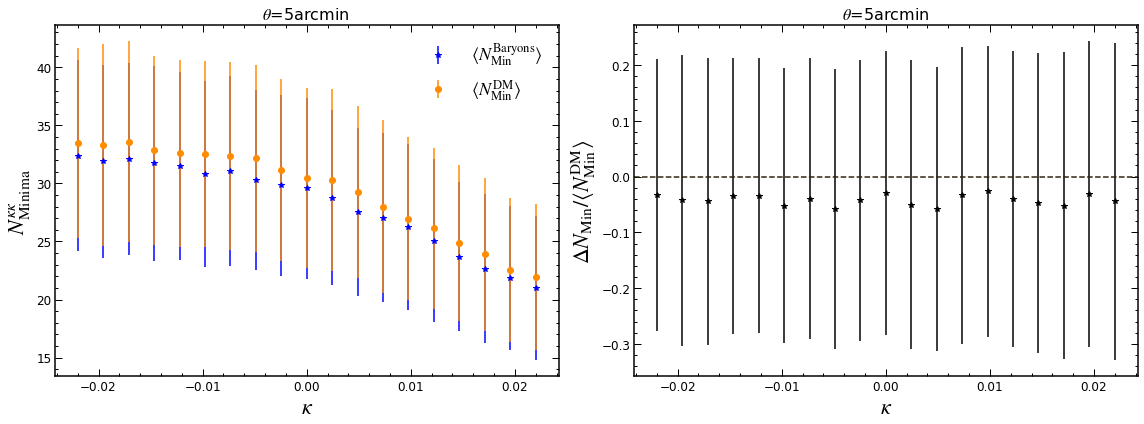

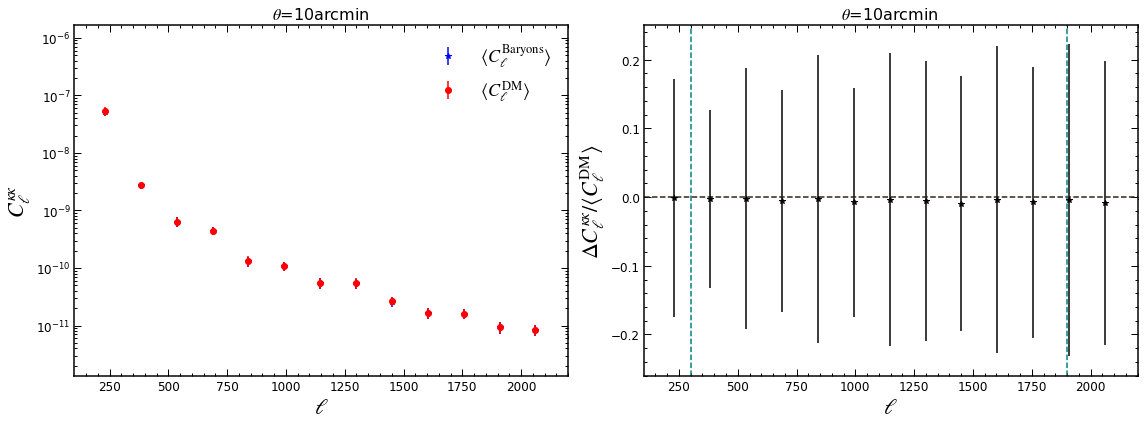

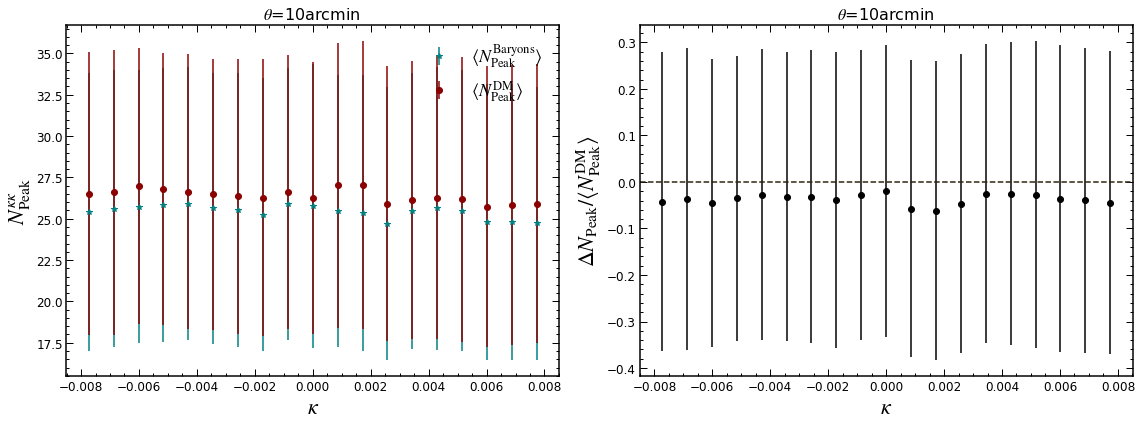

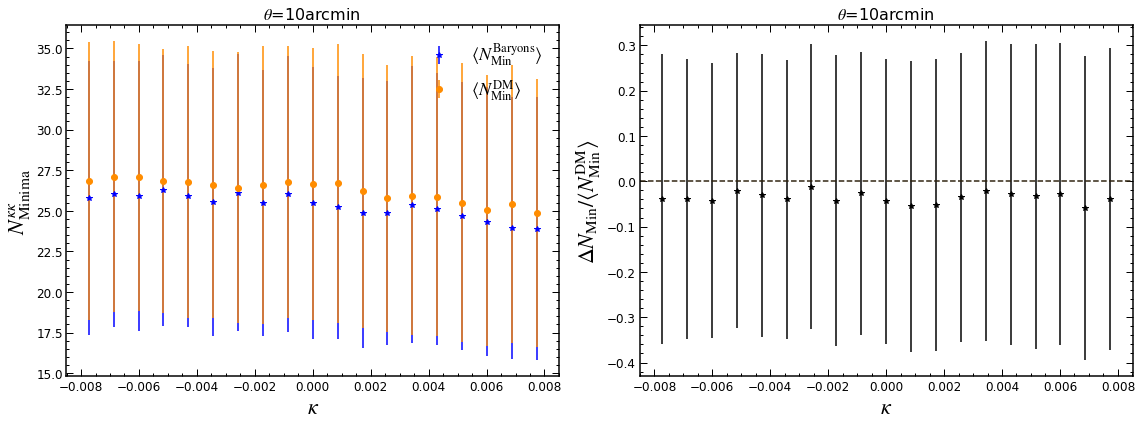

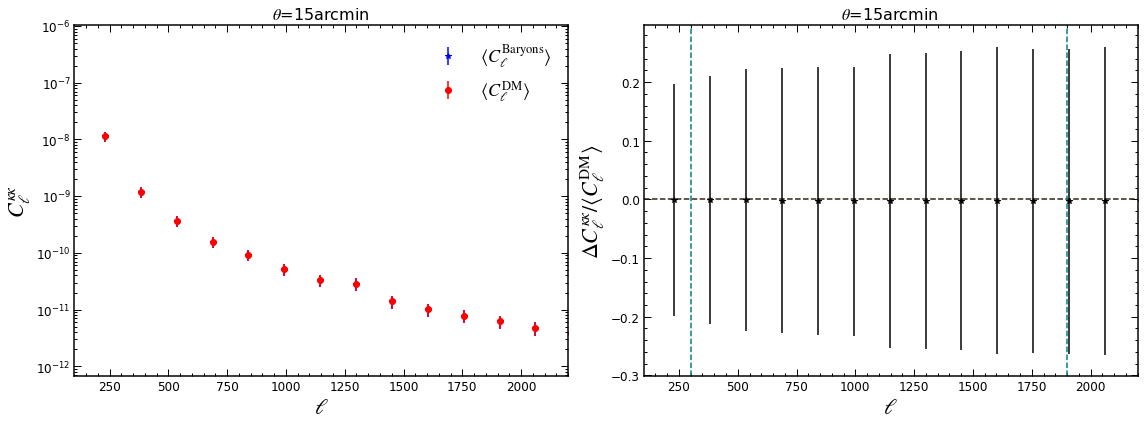

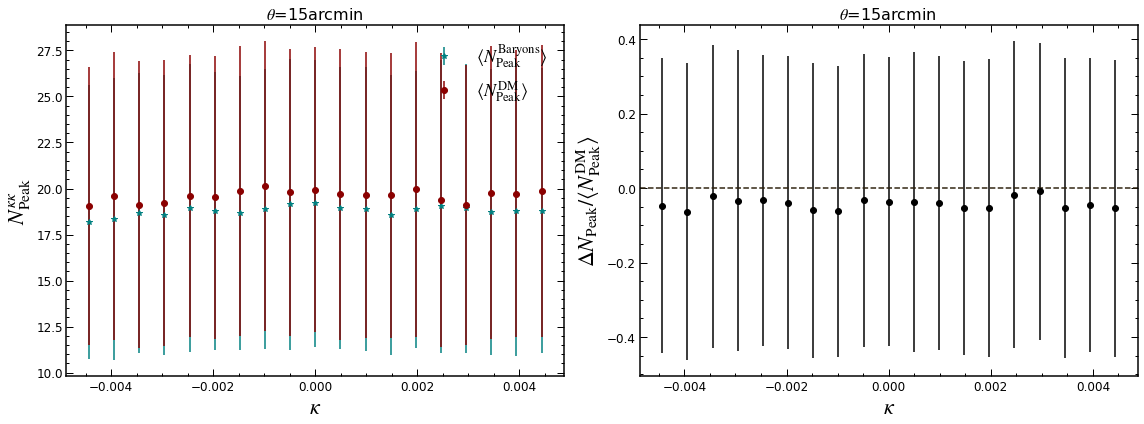

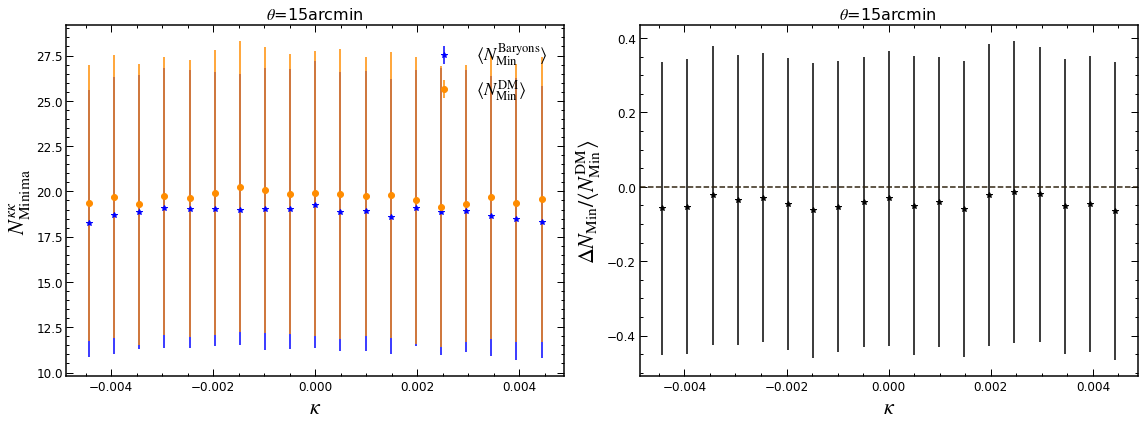

In [37]:
path_stats_h ='/home/gabriela/Documents/Pesquisa/NG_project/data/stats_TNG/stats_TNG_Hydro/'
path_stats_d ='/home/gabriela/Documents/Pesquisa/NG_project/data/stats_TNG/stats_TNG_Dark/'
zs = ['singlez']
std_scale = np.sqrt((137/25)**(-1))
print(std_scale)
nsims = 1#999
#NEed to scale the std by the HSC area instead of nsims
for zz in range(len(zs)):
    std_m = np.load('/home/gabriela/Documents/Pesquisa/NG_project/data/mean_std_fid_mocks/mean_std_wide12hallsmoothscales_'+zs[zz]+'.npy')
    
    
    clee_d = np.load(path_stats_d+'power_spectrum/clee_allsmooths_allsims_'+zs[zz]+'.npy')
    clee_h = np.load(path_stats_h+'power_spectrum/clee_allsmooths_allsims_'+zs[zz]+'.npy')
    
    
    m_clee_d = [np.mean(clee_d[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    m_clee_h = [np.mean(clee_h[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    cov_clee_d = [ np.cov(clee_d[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    cov_clee_h = [np.cov(clee_h[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    std_clee_d = [np.std(clee_d[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))] 
    std_clee_h = [np.std(clee_h[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))] 
#     std_clee_total = [np.sqrt( (std_clee_d[thetag])**2 + (std_clee_h[thetag])**2) for thetag in range(len(theta_smooth))]
    
    std_clee_total =  std_clee_d 
    
    
    peaks_d = np.load(path_stats_d+'peaks/peaks_allsmooths_allsims_'+zs[zz]+'.npy')
    peaks_h = np.load(path_stats_h+'peaks/peaks_allsmooths_allsims_'+zs[zz]+'.npy')
    
    
    m_peaks_d = [np.mean(peaks_d[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    m_peaks_h = [np.mean(peaks_h[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    cov_peaks_d = [np.cov(peaks_d[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    cov_peaks_h = [np.cov(peaks_h[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    
    
    #covariance should be scaled by (A/25 deg2)C(25deg)
    std_peaks_d = [np.std(peaks_d[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))] 
    std_peaks_h = [np.std(peaks_h[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))] 
    
#     std_peaks_total = [np.sqrt((std_peaks_d[thetag])**2 + (std_peaks_h[thetag])**2) for thetag in range(len(theta_smooth))]
    std_peaks_total = std_peaks_d 
    
    min_d = np.load(path_stats_d+'minima/minima_allsmooths_allsims_'+zs[zz]+'.npy')
    min_h = np.load(path_stats_h+'minima/minima_allsmooths_allsims_'+zs[zz]+'.npy')
    
    
    m_min_d = [np.mean(min_d[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    m_min_h = [np.mean(min_h[:,thetag,:], axis=0) for thetag in range(len(theta_smooth))]
    cov_min_d = [np.cov(min_d[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    cov_min_h = [np.cov(min_h[:,thetag,:].T) for thetag in range(len(theta_smooth))]
    std_min_d = [np.std(min_d[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))]
    std_min_h = [np.std(min_h[:,thetag,:],axis=0)*std_scale for thetag in range(len(theta_smooth))] 
    
#     std_min_total = [np.sqrt((std_min_d[thetag])**2 + (std_min_h[thetag])**2) for thetag in range(len(theta_smooth))]

    std_min_total = (std_min_d) 
    
    
    print(np.shape(cov_clee_d))

    for tt in range(len(theta_smooth)):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        ax1.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
        ax1.errorbar(ells_uncoupled, m_clee_h[tt], std_clee_h[tt], fmt='*',color='b',label=r'$\langle C_{\ell}^{\rm Baryons}\rangle$')
        ax1.errorbar(ells_uncoupled, m_clee_d[tt], std_clee_d[tt], fmt='o',color='r', label=r'$\langle C_{\ell}^{\rm DM}\rangle$')
        ax1.set_yscale('log')
        ax1.legend(fontsize=18)
        ax1.set_ylabel(r'$C_{\ell}^{\kappa\kappa}$')
        ax1.set_xlabel(r'$\ell$')
        ax1.set_xlim(100,2200)

        ax2.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
        ax2.errorbar(ells_uncoupled, (m_clee_h[tt] - m_clee_d[tt])/m_clee_d[tt], std_clee_total[tt]/m_clee_d[tt],  fmt='*',color='k')
        ax2.set_ylabel(r'$\Delta C_{\ell}^{\kappa\kappa}/\langle C_{\ell}^{\rm DM}\rangle$')
        ax2.set_xlabel(r'$\ell$')
        ax2.axhline(linestyle='dashed')
        ax2.axvline(300, color='teal',linestyle='--')
        ax2.axvline(1900, color='teal',linestyle='--')
        ax2.set_xlim(100,2200)
        plt.tight_layout()
        plt.savefig('/home/gabriela/Documents/Pesquisa/NG_project/figures/baryons/clee_dark_baryons_'+zs[zz]+'_theta'+str(theta_smooth[tt])+'.pdf')

        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        ax1.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
        ax1.errorbar(np.linspace(-4,4,19)*std_m[tt], m_peaks_h[tt], std_peaks_h[tt], fmt='*',color='teal',label=r'$\langle N_{\rm Peak}^{\rm Baryons}\rangle$')
        ax1.errorbar(np.linspace(-4,4,19)*std_m[tt], m_peaks_d[tt],std_peaks_d[tt], fmt='o',color='darkred', label=r'$\langle  N_{\rm Peak}^{\rm DM}\rangle$')
        ax1.legend(fontsize=18)
        ax1.set_ylabel(r'$ N_{\rm Peak}^{\kappa\kappa}$')
        ax1.set_xlabel(r'$\kappa$')
        ax2.axhline(linestyle='dashed')

        ax2.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
        ax2.errorbar(np.linspace(-4,4,19)*std_m[tt], (m_peaks_h[tt]-m_peaks_d[tt])/m_peaks_d[tt], std_peaks_total[tt]/m_peaks_d[tt], fmt='o',color='k') 
#         ax2.plot(np.linspace(-4,4,19)*std_m[tt], m_peaks_h[tt]/m_peaks_d[tt] ,'*',color='k')
        ax2.set_ylabel(r'$\Delta N_{\rm Peak}/\langle  N_{\rm Peak}^{\rm DM}\rangle$')
        ax2.set_xlabel(r'$\kappa$')
        plt.tight_layout()
        plt.savefig('/home/gabriela/Documents/Pesquisa/NG_project/figures/baryons/peak_dark_baryons_'+zs[zz]+'_theta'+str(theta_smooth[tt])+'.pdf')

    
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        ax1.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
        ax1.errorbar(-1*np.linspace(-4,4,19)*std_m[tt], m_min_h[tt], std_min_h[tt], fmt='*',color='b',label=r'$\langle N_{\rm Min}^{\rm Baryons}\rangle$')
        ax1.errorbar(-1*np.linspace(-4,4,19)*std_m[tt], m_min_d[tt], std_min_d[tt], fmt='o',color='darkorange', label=r'$\langle  N_{\rm Min}^{\rm DM}\rangle$')
        ax1.legend(fontsize=18)
        ax2.axhline(linestyle='dashed')
        ax1.set_ylabel(r'$ N_{\rm Minima}^{\kappa\kappa}$')
        ax1.set_xlabel(r'$\kappa$')
        ax2.set_title(r'$\theta$='+str(theta_smooth[tt])+'arcmin ')
#         ax1.errorbar(ells_uncoupled, m_clee_h[tt], std_clee_h[tt], fmt='o',color='r',label='Baryons')
        ax2.errorbar(-1*np.linspace(-4,4,19)*std_m[tt], (m_min_h[tt]-m_min_d[tt])/m_min_d[tt], std_min_total[tt]/m_min_d[tt],fmt='*', color='k' )
#         ax2.plot(np.linspace(-4,4,19)*std_m[tt], m_min_h[tt]/m_min_d[tt] ,'*',color='k')
        ax2.set_ylabel(r'$\Delta N_{\rm Min}/\langle  N_{\rm Min}^{\rm DM}\rangle$')
        ax2.set_xlabel(r'$\kappa$')
        plt.tight_layout()
        plt.savefig('/home/gabriela/Documents/Pesquisa/NG_project/figures/baryons/minima_dark_baryons_'+zs[zz]+'_theta'+str(theta_smooth[tt])+'.pdf')

             
             